In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-and-ml-jobs/final_job_list.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df=pd.read_csv('/kaggle/input/ai-and-ml-jobs/final_job_list.csv')
df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


In [4]:
df.shape

(692, 7)

In [5]:
df.columns

Index(['Title', 'Company', 'Location', 'Type of Positions', 'Job Description',
       'Salary', 'Identified_Skills'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              692 non-null    object 
 1   Company            692 non-null    object 
 2   Location           692 non-null    object 
 3   Type of Positions  692 non-null    object 
 4   Job Description    692 non-null    object 
 5   Salary             692 non-null    float64
 6   Identified_Skills  692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [7]:
df.nunique()

Title                212
Company              207
Location              38
Type of Positions      1
Job Description      270
Salary               177
Identified_Skills    132
dtype: int64

In [8]:
df=df.drop('Type of Positions',axis=1)
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


In [9]:
df['Company'].value_counts()

Company
Recruiting From Scratch                            284
Booz Allen Hamilton                                 21
CVS Health                                          10
Microsoft                                            9
NVIDIA                                               7
                                                  ... 
Ibotta                                               1
US Assistant Secretary for Public and Indian...      1
US Office of Enterprise Integration                  1
General Atomics and Affiliated Companies             1
accelerate360                                        1
Name: count, Length: 207, dtype: int64

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')  
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
print(df['Job Description'][2])

Clearance Level None Category Data Science Location Remote, Working from the USA 


Public Trust: MBI Full 5C (T3) 
Requisition Type: Regular 
Your Impact 
Own your opportunity to work alongside federal civilian agencies. Make an impact by providing services that help the government ensure the well being of U.S. citizens.
 Job Description

 GDIT is seeking a Data Systems Analyst/Architect to support the NIH Office of Management (OM) Administrative Systems Technology Officer (ASTO) in undertaking a multi-year effort to implement a large-scale data strategy and governance program. This initiative represents a foundational change in the data support model throughout the enterprise performance lifecycle (EPLC) of the numerous systems which provide decision support data to the multiple mission-critical areas of responsibility within the OM. This position is an internal and external customer-facing role that works directly with leadership, stakeholders, business management teams, and technic

In [12]:
import re

In [13]:
def preprocessing_text(text):
    #lemmatizer = WordNetLemmatizer()
    #emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    text= text.lower()
    text = text.split()
    #text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)  
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    #text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    return text

In [14]:
preprocessing_text(df['Job Description'][0])

'about thredup thredup is transforming resale with technology and a mission to inspire a new generation of consumers to think secondhand first by making it easy to buy and sell secondhand thredup has become one of the worlds largest online resale platforms for apparel shoes and accessories sellers love thredup because we make it easy to clean out their closets and unlock value for themselves or for the charity of their choice while doing good for the planet buyers love shopping value premium and luxury brands all in one place at up to off estimated retail price our proprietary operating platform is the foundation for our managed marketplace and consists of distributed processing infrastructure proprietary software and systems and data science expertise with thredups resaleasaservice some of the worlds leading brands and retailers are leveraging our platform to deliver customizable scalable resale experiences to their customers thredup has processed over million unique secondhand items 

In [15]:
df['Job Description']=df['Job Description'].apply(lambda x:preprocessing_text(x))
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


In [16]:
df['Tokens']=df['Job Description'].apply(lambda x:word_tokenize(x))
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re..."
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o..."
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc..."


In [17]:
english_stopwords = stopwords.words('english')


In [18]:
for i in df['Tokens']:
    stop=[]
    for j in i:
        if j not in english_stopwords:
            stop.append(j)
            

In [19]:
df['new']=df['Tokens'].apply(lambda x:[i for i in x if i not in english_stopwords])
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn..."
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv..."
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci..."


In [20]:
df['text']=df['new'].apply(lambda x:' '.join(x))
df.head()
    

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new,text
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn...",thredup thredup transforming resale technology...
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ...",vicarious talent agency represents established...
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien...",clearance level none category data science loc...
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv...",bring heart cvs health every one us cvs health...
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci...",job summary seeking experienced data scientist...


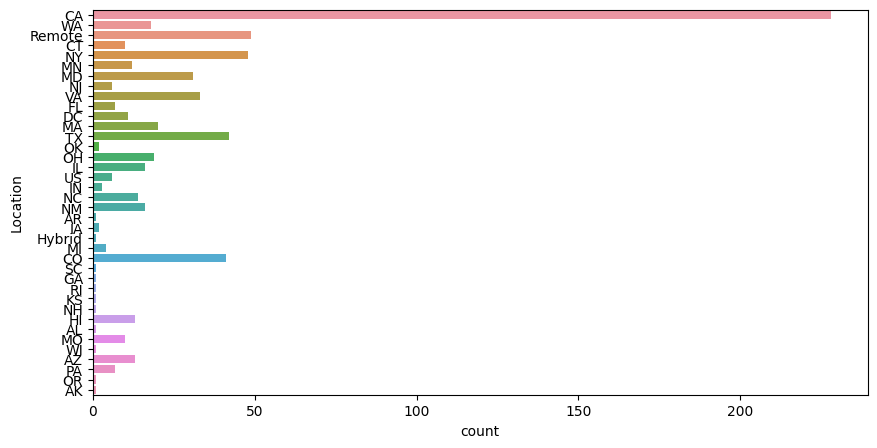

In [21]:
sns.countplot(y=df['Location'])
plt.show()

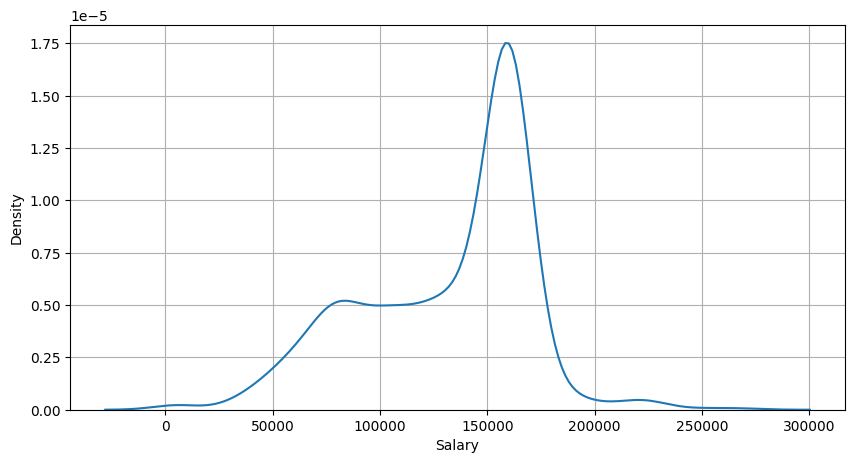

In [22]:
sns.kdeplot(df['Salary'])
plt.grid()
plt.show()

In [23]:
df['skills']=df['Identified_Skills'].apply(lambda x:[x][0])
df.head()

,Title,Company,Location,Job Description,Salary,Identified_Skills,Tokens,new,text,skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,about thredup thredup is transforming resale w...,190000.0,"['python', 'machine learning', 'aws', 'sql']","[about, thredup, thredup, is, transforming, re...","[thredup, thredup, transforming, resale, techn...",thredup thredup transforming resale technology...,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,we are vicarious a talent agency that represen...,70000.0,"['python', 'machine learning', 'deep learning'...","[we, are, vicarious, a, talent, agency, that, ...","[vicarious, talent, agency, represents, establ...",vicarious talent agency represents established...,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,clearance level none category data science loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ...","[clearance, level, none, category, data, scien...","[clearance, level, none, category, data, scien...",clearance level none category data science loc...,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,bring your heart to cvs health every one of us...,140000.0,"['python', 'machine learning', 'aws', 'gcp']","[bring, your, heart, to, cvs, health, every, o...","[bring, heart, cvs, health, every, one, us, cv...",bring heart cvs health every one us cvs health...,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,job summary we are seeking an experienced data...,136000.0,"['python', 'machine learning', 'tableau', 'aws...","[job, summary, we, are, seeking, an, experienc...","[job, summary, seeking, experienced, data, sci...",job summary seeking experienced data scientist...,"['python', 'machine learning', 'tableau', 'aws..."


In [24]:
tf=TfidfVectorizer()
vector=tf.fit_transform(df['text']).toarray()


In [25]:
data=df[['Salary','text']]
data

,Salary,text
0,190000.0,thredup thredup transforming resale technology...
1,70000.0,vicarious talent agency represents established...
2,104000.0,clearance level none category data science loc...
3,140000.0,bring heart cvs health every one us cvs health...
4,136000.0,job summary seeking experienced data scientist...
...,...,...
687,160000.0,recruiting scratch recruiting scratch premier ...
688,160000.0,recruiting scratch recruiting scratch premier ...
689,160000.0,recruiting scratch recruiting scratch premier ...
690,160000.0,recruiting scratch recruiting scratch premier ...


In [26]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y=data['Salary']
x=vector

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr_model=lr.fit(xtrain,ytrain)
lr_model

LinearRegression()

In [33]:
lr_model.intercept_

101335.59146791956

In [34]:
lr_model.coef_

array([  -651.60811967, -56348.75572952,  18933.5048583 , ...,
        -3845.53371637,  -3179.19976234,   1331.33865313])

In [35]:
y_pred=lr_model.predict(xtest)
y_pred

array([160000.        , 160000.        ,  66871.60960819, 160000.        ,
        99181.5677752 ,  60000.        , 160000.        , 128337.89774516,
       160000.        ,  76693.68415809, 225000.        ,  91441.63629812,
       160000.        , 123626.        , 129818.44671154, 160000.        ,
       160000.        , 160000.        , 160000.        , 160000.        ,
       160000.        , 160000.        , 111049.05346088, 160000.        ,
       160000.        , 160000.        ,  99725.5408682 , 124000.        ,
       138100.        , 160000.        , 134654.45180058, 125000.        ,
       122063.82194206, 143287.86885459, 160000.        , 160000.        ,
         4145.        , 160000.        ,  81469.01179454,  69451.87197143,
       109600.        , 130929.        , 115078.82300786, 150000.        ,
        88688.04576489, 160000.        , 141900.        ,  86000.        ,
       135000.        , 160000.        , 120297.19207949,  71620.92061449,
       160000.        , 1

In [36]:
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
r2_score(ytest,y_pred)

0.7885145877677237

In [38]:
np.sqrt(mean_squared_error(ytest,y_pred))

18287.49181448659

In [39]:
lr_model.coef_


array([  -651.60811967, -56348.75572952,  18933.5048583 , ...,
        -3845.53371637,  -3179.19976234,   1331.33865313])

In [40]:
len(lr_model.coef_)

10418

In [41]:
len(xtrain[0])

10418

In [42]:
xtrain.shape

(553, 10418)

In [43]:
df_weight=pd.DataFrame(xtrain.T,columns=['desc_'+str(i) for i in range(0,xtrain.shape[0])])
df_weight

,desc_0,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_543,desc_544,desc_545,desc_546,desc_547,desc_548,desc_549,desc_550,desc_551,desc_552
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08073


In [44]:
df_weight['weight']=pd.Series(lr_model.coef_)
df_weight.head()

,desc_0,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,desc_8,desc_9,...,desc_544,desc_545,desc_546,desc_547,desc_548,desc_549,desc_550,desc_551,desc_552,weight
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-651.608120
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-56348.755730
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18933.504858
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17953.903885
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7099.345028


In [45]:
print(f"The Base Salary for AI/ML Jobs can be interpreted as: {lr_model.intercept_}")

The Base Salary for AI/ML Jobs can be interpreted as: 101335.59146791956


As we vectorized the entire text description, we get coefficients on applying the algorithm, can be termed as parameters for evaluating words for predicting the salary.
When we insert any new job description, it will preprocessed as mentioned above, vectorized and then can be subjected to algorithms.
here, we have used `LinearRegression()` algorithm for predicting the salary, with 78.85% accuracy 
One can always go for other Regression Algorithms, such as `DecisionTreeRegressor()`, `RandomForestRegressor()`, `KNeighborsRegressor()` and many more.